In [1]:
!pip install kneed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime ,timedelta

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [6]:
data = pd.read_csv('/content/drive/MyDrive/KPMG/clean_data.csv',index_col=0) 

In [7]:
data.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,lasted_for_years,discount_amt,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,5,17.87,Male,19,Financial Services,Mass Customer,Yes,10.0,Victoria,6,62.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,14,448.68,Male,19,Financial Services,Mass Customer,Yes,10.0,Victoria,6,62.0


In [8]:
data['month'] = data.transaction_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)

In [9]:
data.drop(['transaction_id','product_id','customer_id','order_status','transaction_date'],axis=1, inplace=True) # removing variables that do not add any significant variance.

In [10]:
# standardising the numerical columns

num_cols = ['standard_cost','lasted_for_years','discount_amt','past_3_years_bike_related_purchases','tenure','property_valuation','age','month']
feature = data[num_cols]
scaler = StandardScaler().fit(feature.values)
feature = scaler.transform(feature.values)
scaled_features = pd.DataFrame(feature, columns = num_cols)
scaled_features.head()

,standard_cost,lasted_for_years,discount_amt,past_3_years_bike_related_purchases,tenure,property_valuation,age,month
0,-1.237847,-1.007344,-1.082157,-1.040916,-0.123531,-0.537132,1.777155,-1.309672
1,0.982222,0.132681,-0.208977,-1.040916,-0.123531,-0.537132,1.777155,1.009131
2,-0.634053,-0.754005,-0.754681,-1.040916,-0.123531,-0.537132,1.777155,-0.729971
3,-0.411849,-1.260683,2.332409,1.406628,-0.123531,-0.891155,-0.149257,-0.440121
4,0.299007,-0.880674,-0.202957,1.406628,-0.123531,-0.891155,-0.149257,1.009131


In [11]:
# dummy variables for the categorical variable

cat_cols = ['brand','product_line','product_class','product_size','gender','job_industry_category','wealth_segment','owns_car','state']
categorical_df = data[cat_cols]
cat_df = pd.get_dummies(categorical_df, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [12]:
data = pd.concat([cat_df, scaled_features],axis=1)

In [13]:
data.head()

,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,product_class_high,product_class_low,product_class_medium,product_size_large,product_size_medium,product_size_small,gender_Female,gender_Male,gender_Unknown,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_Unknown,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,state_New South Wales,state_Queensland,state_Victoria,standard_cost,lasted_for_years,discount_amt,past_3_years_bike_related_purchases,tenure,property_valuation,age,month
0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,-1.237847,-1.007344,-1.082157,-1.040916,-0.123531,-0.537132,1.777155,-1.309672
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0.982222,0.132681,-0.208977,-1.040916,-0.123531,-0.537132,1.777155,1.009131
2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,-0.634053,-0.754005,-0.754681,-1.040916,-0.123531,-0.537132,1.777155,-0.729971
3,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,-0.411849,-1.260683,2.332409,1.406628,-0.123531,-0.891155,-0.149257,-0.440121
4,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0.299007,-0.880674,-0.202957,1.406628,-0.123531,-0.891155,-0.149257,1.009131


Using the elbow method to determine the value of k

Text(0, 0.5, 'Inertia')

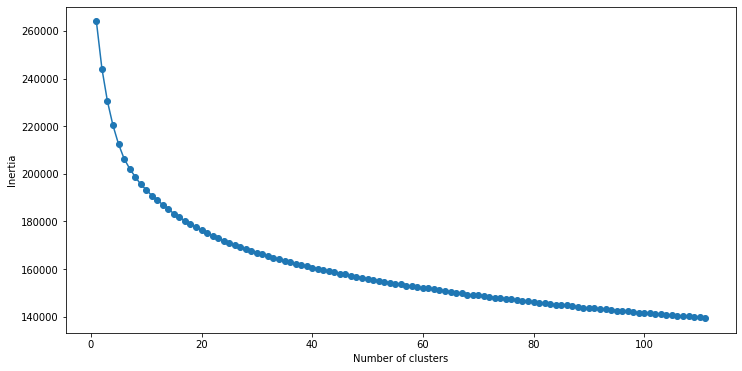

In [ ]:
SSE = []

for cluster in range(1,112):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,112), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Inertia')

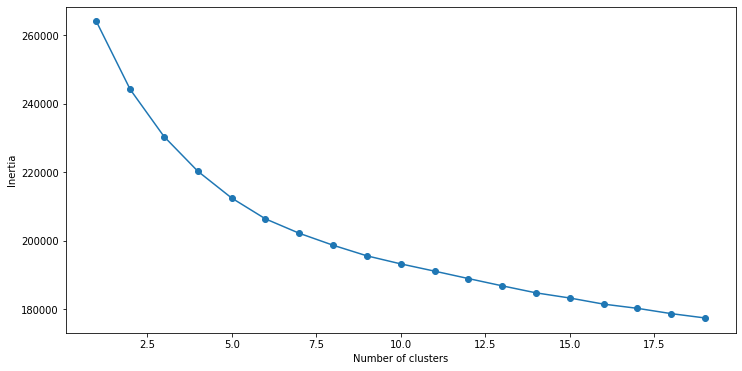

In [ ]:
SSE = []

for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

I am having trouble in finding the value for k, so I decided to use the Silhouette Method to see if a particular value of k is good or not. 

If the value is closer to 1 then the k value is good. But there were no value of k for which the Silhouette value is more than 0.5. they all range from 0.03 - 0.08 which is very low. 

So I can conclude that the data observations do not have that much difference amoung themselves to create cluster.

In [14]:
# First, build a model with 4 clusters

kmeans = KMeans(n_jobs = -1, n_clusters = 2, init='k-means++')
kmeans.fit(data)

# Now, print the silhouette score of this model

print(silhouette_score(data, kmeans.labels_, metric='euclidean'))

0.07746657541367051


In [15]:
# First, build a model with 4 clusters

kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data)

# Now, print the silhouette score of this model

print(silhouette_score(data, kmeans.labels_, metric='euclidean'))

0.07291442268085754


In [16]:
# First, build a model with 4 clusters

kmeans = KMeans(n_jobs = -1, n_clusters = 8, init='k-means++')
kmeans.fit(data)

# Now, print the silhouette score of this model

print(silhouette_score(data, kmeans.labels_, metric='euclidean'))

0.056720135237265296


In [ ]:
# First, build a model with 4 clusters

kmeans = KMeans(n_jobs = -1, n_clusters = 15, init='k-means++')
kmeans.fit(data)

# Now, print the silhouette score of this model

print(silhouette_score(data, kmeans.labels_, metric='euclidean'))

0.05337125364065405


In [ ]:
# First, build a model with 4 clusters

kmeans = KMeans(n_jobs = -1, n_clusters = 25, init='k-means++')
kmeans.fit(data)

# Now, print the silhouette score of this model

print(silhouette_score(data, kmeans.labels_, metric='euclidean'))

0.05116066871960225


In [ ]:
# First, build a model with 4 clusters

kmeans = KMeans(n_jobs = -1, n_clusters = 35, init='k-means++')
kmeans.fit(data)

# Now, print the silhouette score of this model

print(silhouette_score(data, kmeans.labels_, metric='euclidean'))

0.049346554302172094


In [ ]:
# First, build a model with 4 clusters

kmeans = KMeans(n_jobs = -1, n_clusters = 45, init='k-means++')
kmeans.fit(data)

# Now, print the silhouette score of this model

print(silhouette_score(data, kmeans.labels_, metric='euclidean'))

0.04936157343304597
